In [21]:
import pandas as pd

df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


Import dataset and show top 10 rows of data

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X = df.iloc[:,4:7]
Y = df.iloc[:,4]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)



Split whole dataset.Select variables for X and Y. Capacity Ratio: Train/Test:80/20 

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor


param_grid={
    "learning_rate":[0.05,0.1,0.15],
    "n_estimators":[300,400,500],
    "max_depth":[3,4,5],
    "min_child_weight":[0.7,0.8,0.9],
    "gamma":[0.0,0.1,0.2],

}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=300; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=300; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=300; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=300; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=300; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=400; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=400; total time=   0.1s
[CV] END gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=0.7, n_estimators=400; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.05, 

I used GridSerchcv function as efficient way to find out best_params.I selected 5 aspects as XGBRegressor changable parameters, and others setting is default.Finally, the best selection of those parameters shows that"Best Parameters: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 0.7, 'n_estimators': 500}"

In [33]:
model = XGBRegressor(max_depth = 5,gamma=0.0,min_child_weight=0.7,learning_rate =0.05,n_estimators=500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

predictions = [round(value) for value in y_pred] 


# Only be used in label classification
# accuracy = accuracy_score(y_test,y_pred)
# print("Accuracy;%2f%%"%(accuracy*100))

Having chosen the best_params , I used XGBRegressor to fit the model. To reduce calculation bias, I rounded all values in y_pred. During the estimation, I used to try accuracy_score to evaluate the model but faliure. With the help, I reliazed that accuracy_score is applied in continus score,not in label prediction.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.3515247967811899
Mean Squared Error: 0.6042565825151183
R-squared: 0.9999797365050431


So,the easiest but also efficient way is to use MSE,MAE,R-Squared, which is widely used in model evaluation.According the evaluation,it seems that the params choice is great that 3 errors remain low levels

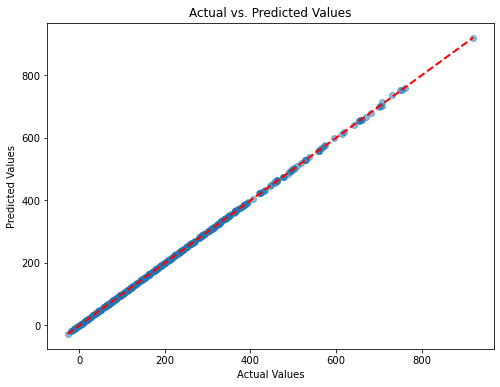

In [35]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Finally, I use the matplotlib function to draw out final result in prediction, and put together with real values to compare the fittness.